In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

# Stage 1 Sourcing and Loading Data

In [2]:
# Now that the files are saved, we want to load them into Python using read_csv and pandas.

# Read the csv file into a data frame called Google using the read_csv() pandas method.
google_df = pd.read_csv('googleplaystore.csv')

# Using the head() pandas method, observe the first three entries.
google_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
# Read the csv file into a pandas DataFrame object called Apple.
apple_df = pd.read_csv('AppleStore.csv')

# Observe the first three entries like you did with your other data. 
apple_df.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


## Pick the columns we need to work 

In [4]:
# Subset our DataFrame object Google by selecting just the variables ['Category', 'Rating', 'Reviews', 'Price']
google_df = google_df[['Category', 'Rating', 'Reviews', 'Price']]

# Check the first three entries
google_df.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [5]:
# Do the same with our Apple object, selecting just the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
apple_df = apple_df[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

# Let's check the first three entries
apple_df.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


# Stage 2 - Cleaning, transforming and visualizing

In [6]:
# Using the dtypes feature of pandas DataFrame objects, check out the data types within our Apple dataframe.
apple_df.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [7]:
# Using the same dtypes feature, check out the data types of our Google dataframe. 
google_df.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [8]:
# Use the unique() pandas method on the Price column to check its unique values. 
google_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

Everyone is a problem as well as the dollar signs

In [9]:
# Pick out just those rows whose value for the 'Price' column is just 'Everyone'. 
google_df.loc[google_df['Price'] == 'Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [10]:
#Eliminate row with Everyone
google_df = google_df.loc[google_df['Price'] != 'Everyone']
# Check again the unique values of Google
google_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Work on the dollar sign issue

In [11]:
# Let's create a variable called nosymb.
# This variable will take the Price column of Google and apply the str.replace() method. 
nosymb = google_df['Price'].str.replace('$', '')

# Now we need to do two things:
# i. Make the values in the nosymb variable numeric using the to_numeric() pandas method.
nosymb = pd.to_numeric(nosymb)
# ii. Assign this new set of numeric, dollar-sign-less values to Google['Price']. 
google_df['Price'] = nosymb

In [12]:
# Use the function dtypes. 
google_df.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

Change Review column to numeric as well

In [13]:
# Convert the 'Reviews' column to a numeric data type. 
google_df['Reviews'] = google_df['Reviews'].astype(int)

In [14]:
# Let's check the data types of Google again
google_df.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

#### Add a platform column to both the Apple and the Google dataframes

In [15]:
# Create a column called 'platform' in both the Apple and Google dataframes. 
# Add the value 'apple' and the value 'google' as appropriate. 
apple_df['Platform'] = 'apple'
google_df['Platform'] = 'google'

#### Changing the column names to prepare for our join of the two datasets

In [16]:
# Create a variable called old_names where you'll store the column names of the Apple dataframe. 
# Use the feature .columns.
old_names = apple_df.columns
# Create a variable called new_names where you'll store the column names of the Google dataframe. 
new_names = google_df.columns
# Use the rename() DataFrame method to change the columns names. 
apple_df.rename(columns = {'prime_genre':'Category', 'user_rating': 'Rating', 'rating_count_tot': 'Reviews',
                           'price': 'Price'}, inplace = True)

#### Join the datasets

In [17]:
# Let's use the append() method to append Apple to Google. 
df = google_df.append(apple_df)
# Using the sample() method with the number 12 passed to it, check 12 random points of your dataset.
df.sample(12)

,Category,Rating,Reviews,Price,Platform
4499,FAMILY,4.1,24668,0.0,google
6794,Games,3.5,107,0.0,apple
3770,Games,4.5,3491,0.0,apple
3878,FAMILY,4.6,94989,0.0,google
1256,HEALTH_AND_FITNESS,4.8,428156,0.0,google
10040,WEATHER,4.2,8723,0.0,google
6814,GAME,3.3,294,0.0,google
8646,GAME,4.0,271214,0.0,google
1550,LIBRARIES_AND_DEMO,4.7,831,0.0,google
10145,PHOTOGRAPHY,3.1,7300,0.0,google


#### Eliminate NaN values

In [18]:
# Lets check first the dimesions of df before droping `NaN` values. Use the .shape feature. 
print('The previous shape was', df.shape)
df.dropna(inplace = True)
print('The new shape is', df.shape)

The previous shape was (18037, 5)
The new shape is (16563, 5)


#### Filter the data so that we only see whose apps that have been reviewed at least once

In [19]:
# Subset your df to pick out just those rows whose value for 'Reviews' is equal to 0. 
df_zero = df.loc[df['Reviews'] == 0]
# Do a count() on the result. 
df_zero.count()

Category    929
Rating      929
Reviews     929
Price       929
Platform    929
dtype: int64

In [20]:
# Eliminate the points that have 0 reviews.
df = df.loc[df['Reviews'] != 0]

#### Summarize the data visually and analytically (by the column platform)

In [21]:
# To summarize analytically, let's use the groupby() method on our df.
df.groupby('Platform').agg('mean')

,Rating,Reviews,Price
Platform,,,
apple,4.049697,14803.805520,1.821977
google,4.191757,514049.836536,0.960928


In [22]:
#Not too much difference between Apple and Google store on the Rating column

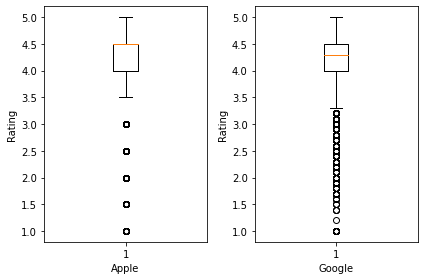

In [23]:
#Visual summary of the Rating column, separated by the different platforms.
#Plot apple
df_apple = df.loc[df['Platform'] == 'apple']
df_google = df.loc[df['Platform'] == 'google']
# Call the boxplot() method on our df.
plt.subplot(1,2,1)
plt.boxplot(x = 'Rating', data = df_apple)
plt.xlabel('Apple')
plt.ylabel('Rating')
plt.subplot(1,2,2)
plt.boxplot(x = 'Rating', data = df_google)
plt.xlabel('Google')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Stage 3 Modeling

#### Data Distribution

In [24]:
# Create a subset of the column 'Rating' by the different platforms.
# Call the subsets 'apple' and 'google' 
df_apple_rating = df_apple['Rating']
df_google_rating = df_google['Rating']

In [25]:
# Using the stats.normaltest() method, get an indication of whether the apple data are normally distributed
apple_normal = stats.normaltest(df_apple_rating)
# Save the result in a variable called apple_normal, and print it out
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [26]:
# Using the stats.normaltest() method, get an indication of whether the google data are normally distributed
google_normal = stats.normaltest(df_google_rating)
# Save the result in a variable called apple_normal, and print it out
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


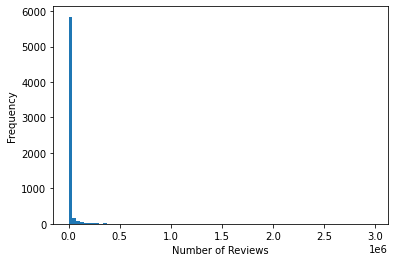

In [27]:
#Set a number of bins with the less possible bins' bias
n_bins = np.sqrt(len(df_apple['Reviews']))
n_bins = int(n_bins)
# Create a histogram of the apple reviews distribution
plt.hist(df_apple['Reviews'], bins = n_bins)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

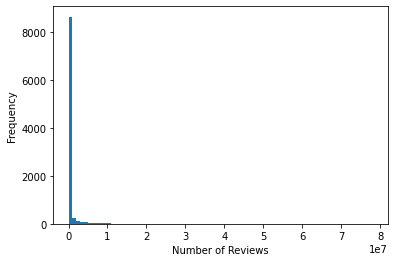

In [28]:
# Create a histogram of the google reviews distribution
plt.hist(df_google['Reviews'], bins = n_bins)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

#### Permutation Test

In [29]:
#Our Null Hypothesis is that platform does not have any influence on Ratings.

In [30]:
# Create a column called `Permutation1`, and assign to it the result of permuting (shuffling) the Rating column
df['Permutation1_Rating'] = np.random.permutation(df['Rating'])
# Call the describe() method on our permutation grouped by 'platform'. 
df[['Permutation1_Rating', 'Platform']].groupby('Platform').describe().T

Platform                         apple       google
Permutation1_Rating count  6268.000000  9366.000000
                    mean      4.129579     4.138298
                    std       0.616159     0.610806
                    min       1.000000     1.000000
                    25%       4.000000     4.000000
                    50%       4.300000     4.300000
                    75%       4.500000     4.500000
                    max       5.000000     5.000000

In [31]:
# Lets compare with the previous analytical summary:
df[['Rating', 'Platform']].groupby('Platform').describe().T

Platform            apple       google
Rating count  6268.000000  9366.000000
       mean      4.049697     4.191757
       std       0.726943     0.515219
       min       1.000000     1.000000
       25%       4.000000     4.000000
       50%       4.500000     4.300000
       75%       4.500000     4.500000
       max       5.000000     5.000000

In [ ]:
'''The difference in the means for Permutation1 (0.001103) now looks hugely different to our observed difference 
of 0.14206. It's sure starting to look like our observed difference is significant, and that the Null is false; 
platform does impact on ratings. But to be sure, let's create 10,000 permutations, calculate the mean ratings for 
Google and Apple apps and the difference between these for each one, and then take the average of all of these 
differences.Let's create a vector with the differences - that will be the distibution of the Null.'''
number_tries = 1000
# First, make a list called difference.
difference = []

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google.
for i in range(number_tries):
    df[i] = np.random.permutation(df['Rating'])
    diff = df.loc[df['Platform'] == 'google'][i].mean() - df.loc[df['Platform'] == 'apple'][i].mean()
    difference.append(diff)

In [ ]:
print('The average of difference of the permutations is', np.mean(difference))

In [ ]:
# Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
n_bins = np.sqrt(len(difference))
n_bins = int(n_bins)
plt.hist(difference, bins = n_bins)
plt.xlabel('Mean Difference')
plt.ylabel('Fequency')
plt.show()

In [ ]:
# Now make a variable called obs_difference, and assign it the result of the mean of our 'apple' variable and 
# the mean of our 'google variable'
obs_difference = df_google_rating.mean() - df_apple_rating.mean()

# Make this difference absolute with the built-in abs() function. 
obs_difference = abs(obs_difference)

# Print out this value; it should be 0.1420605474512291. 
print(obs_difference)

# Stage 4 Evaluating and Concluding

In [ ]:
'''
Recall: The p-value of our observed data is just the proportion of the data given the null that's at least as extreme
as that observed data.

As a result, we're going to count how many of the differences in our difference list are at least as extreme as our 
observed difference.

If less than or equal to 5% of them are, then we will reject the Null. 
'''
p_value = np.sum(np.mean(difference) >= obs_difference)/number_tries
print('We got a p-value of', p_value)

### Conclusion

#### We advise our client to integrate only Google Play into their operating system interface. We reject our Null hypothesis that platform does not impact rating and since we got a p-value of 0.0, we could conclude that platform impacts on ratings

### Other Statistical tests

#### Assuming normal distribution, we could use the normal distribution test to whether reject or not our Null Hypothesis

#### If you want to find the probability of the event happening a certain number, we could use the Binomial Distribution.

#### If we have an average probability of an event happening and we want to find probability of a certain number of events happening in a period of time we can use the Poisson Distribution.

#### Exponential distribution is often used to model the time elapsed between events. 